# Preliminaries and Dataframe Construction

In [7]:
# Import modules
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

#Formatting
plt.rcParams['font.family'] = 'Times New Roman'  # Set plt shows font to Times New Roman
plt.rcParams['axes.grid'] = True  # Ensure line graphs display on graphs
sns.set_palette(sns.color_palette('Accent')) #set color palette to a nice seaborn style https://seaborn.pydata.org/tutorial/color_palettes.html


protocol_order=['Maryland']# 'Maryland_Age']

## Survival rates by capacity

In [3]:
stats_overall_ECI = pd.read_excel('MC-ECI-results-stats.xlsx', sheet_name='Overall')
stats_race_ECI = pd.read_excel('MC-ECI-results-stats.xlsx', sheet_name='Race')

In [4]:
stats_Cho_overall_ECI = pd.read_excel('MC-ECI-results-stats.xlsx', sheet_name='Cho_Overall')
stats_Cho_race_ECI = pd.read_excel('MC-ECI-results-stats.xlsx', sheet_name='Cho_Race')

In [5]:
#Alternative way of deriving CIs over the parameters derived in the runs - i.e. traditional CIs across the rates in each run.

def get_CIs_rates(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                Survived=pd.NamedAgg(column="Survived", aggfunc="mean"),
                Allocated=pd.NamedAgg(column="Allocated", aggfunc="mean"),
                A_rate=pd.NamedAgg(column="A_rate", aggfunc="mean"),
                A_std=pd.NamedAgg(column="A_rate", aggfunc="std"),
                A_sem=pd.NamedAgg(column="A_rate", aggfunc="sem"),
                S_rate=pd.NamedAgg(column="S_rate", aggfunc="mean"),
                S_std=pd.NamedAgg(column="S_rate", aggfunc="std"),
                S_sem=pd.NamedAgg(column="S_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(A_rate_CI_lo = lambda df_: df_['A_rate'] - 1.96* df_['A_sem'],
                A_rate_CI_hi = lambda df_:df_['A_rate'] + 1.96* df_['A_sem'],
                S_rate_CI_lo = lambda df_: df_['S_rate'] - 1.96* df_['S_sem'],
                S_rate_CI_hi = lambda df_:df_['S_rate'] + 1.96* df_['S_sem'],
            )
            .set_index(groups)
            .reindex(columns=['Run','Pop_N','Survived','Allocated','A_rate','A_rate_CI_lo','A_rate_CI_hi', 'S_rate', 'S_rate_CI_lo', 'S_rate_CI_hi'])
            .reset_index()
            .round(4) #round all number to two decimal places
    )

def get_CIs_rates_with_AA(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                Survived=pd.NamedAgg(column="Survived", aggfunc="mean"),
                Allocated=pd.NamedAgg(column="Allocated", aggfunc="mean"),
                A_rate=pd.NamedAgg(column="A_rate", aggfunc="mean"),
                A_std=pd.NamedAgg(column="A_rate", aggfunc="std"),
                A_sem=pd.NamedAgg(column="A_rate", aggfunc="sem"),
                S_rate=pd.NamedAgg(column="S_rate", aggfunc="mean"),
                S_std=pd.NamedAgg(column="S_rate", aggfunc="std"),
                S_sem=pd.NamedAgg(column="S_rate", aggfunc="sem"),
                Age_Adj_S_rate=pd.NamedAgg(column="Age_Adj_S_rate", aggfunc="mean"),
                Age_Adj_S_std=pd.NamedAgg(column="Age_Adj_S_rate", aggfunc="std"),
                Age_Adj_S_sem=pd.NamedAgg(column="Age_Adj_S_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(A_rate_CI_lo = lambda df_: df_['A_rate'] - 1.96* df_['A_sem'],
                A_rate_CI_hi = lambda df_:df_['A_rate'] + 1.96* df_['A_sem'],
                S_rate_CI_lo = lambda df_: df_['S_rate'] - 1.96* df_['S_sem'],
                S_rate_CI_hi = lambda df_:df_['S_rate'] + 1.96* df_['S_sem'],
                Age_Adj_S_rate_CI_lo = lambda df_: df_['Age_Adj_S_rate'] - 1.96* df_['Age_Adj_S_sem'],
                Age_Adj_S_rate_CI_hi = lambda df_:df_['Age_Adj_S_rate'] + 1.96* df_['Age_Adj_S_sem'],
            )
            .set_index(groups)
            .reindex(columns=['Run','Pop_N','Survived','Allocated','A_rate','A_rate_CI_lo','A_rate_CI_hi', 'S_rate', 'S_rate_CI_lo',
                               'S_rate_CI_hi', 'Age_Adj_S_rate','Age_Adj_S_rate_CI_lo','Age_Adj_S_rate_CI_hi'])
            .reset_index()
            .round(4) #round all number to two decimal places
    )

def get_CIs_Cho(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                LE_Total_Cho=pd.NamedAgg(column="LE_Total_Cho", aggfunc="mean"),
                YLL_Cho=pd.NamedAgg(column="YLL_Cho", aggfunc="mean"),
                YLL_Cho_std=pd.NamedAgg(column="YLL_Cho", aggfunc="std"),
                YLL_Cho_sem=pd.NamedAgg(column="YLL_Cho", aggfunc="sem"),
            )
            .reset_index()
            .assign(YLL_Cho_CI_lo = lambda df_: df_['YLL_Cho'] - 1.96* df_['YLL_Cho_sem'],
                YLL_Cho_CI_hi = lambda df_:df_['YLL_Cho'] + 1.96* df_['YLL_Cho_sem']
            )
            .set_index(groups)
            .reindex(columns=['Run','Pop_N', 'LE_Total_Cho', 'YLL_Cho','YLL_Cho_CI_lo','YLL_Cho_CI_hi'])
            .reset_index()
            .round(4) #round all number to two decimal places
    )

##Currently have remove Age-Adjustment since it is hard to interpret in this context.
def get_CIs_Cho_with_AA(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                LE_Total_Cho=pd.NamedAgg(column="LE_Total_Cho", aggfunc="mean"),
                YLL_Cho=pd.NamedAgg(column="YLL_Cho", aggfunc="mean"),
                YLL_Cho_std=pd.NamedAgg(column="YLL_Cho", aggfunc="std"),
                YLL_Cho_sem=pd.NamedAgg(column="YLL_Cho", aggfunc="sem"),
            )
            .reset_index()
            .assign(YLL_Cho_CI_lo = lambda df_: df_['YLL_Cho'] - 1.96* df_['YLL_Cho_sem'],
                YLL_Cho_CI_hi = lambda df_:df_['YLL_Cho'] + 1.96* df_['YLL_Cho_sem'],
            )
            #.round(4) #round all number to two decimal places
            .set_index(groups)
            .reindex(columns=['Run','Pop_N', 'LE_Total_Cho', 'YLL_Cho', 'YLL_Cho_CI_lo', 'YLL_Cho_CI_hi', 'Age_Adj_YLL_Cho_rate','Age_Adj_YLL_Cho_rate_CI_lo','Age_Adj_YLL_Cho_rate_CI_hi'])
            .reset_index()
            .round(4) #round all number to two decimal places
    )

Table S7 - Survival at different Mixes

In [5]:
with pd.ExcelWriter("MC-ECI-Table_S9_Allocation_Survival.xlsx") as writer:
# use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    # 
    get_CIs_rates(stats_overall_ECI, ['Protocol', 'ECI_Cutoff']).to_excel(writer, sheet_name="Overall", index=False)
    get_CIs_rates_with_AA(stats_race_ECI, ['Protocol', 'ECI_Cutoff', 'Race']).to_excel(writer, sheet_name="Race", index=False)
    
    get_CIs_Cho(stats_Cho_overall_ECI, ['Protocol', 'ECI_Cutoff']).to_excel(writer, sheet_name="Cho_Overall", index=False)
    get_CIs_Cho_with_AA(stats_Cho_race_ECI, ['Protocol', 'ECI_Cutoff', 'Race']).to_excel(writer, sheet_name="Cho_Race", index=False)

Table S8 - Lives Saved and Life Years Saved per Mix

In [6]:
#Alternative way of deriving CIs over the parameters derived in the runs - i.e. traditional CIs across the rates in each run.

def get_LS(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                Allocated=pd.NamedAgg(column="Allocated", aggfunc="mean"),
                Survived=pd.NamedAgg(column="Survived", aggfunc="mean"),
                Exp_Surv=pd.NamedAgg(column="Exp_Surv", aggfunc="mean"),
                Lives_Saved=pd.NamedAgg(column="Lives_Saved", aggfunc="mean"),
                LS_std=pd.NamedAgg(column="Lives_Saved", aggfunc="std"),
                LS_sem=pd.NamedAgg(column="Lives_Saved", aggfunc="sem"),
                LS_rate=pd.NamedAgg(column="LS_rate", aggfunc="mean"),
                LS_rate_std=pd.NamedAgg(column="LS_rate", aggfunc="std"),
                LS_rate_sem=pd.NamedAgg(column="LS_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(
                LS_CI_lo = lambda df_3: df_3['Lives_Saved'] - 1.96* df_3['LS_sem'],
                LS_CI_hi = lambda df_3:df_3['Lives_Saved'] + 1.96* df_3['LS_sem'],
                LS_rate_CI_lo = lambda df_3: df_3['LS_rate'] - 1.96* df_3['LS_rate_sem'],
                LS_rate_CI_hi = lambda df_3:df_3['LS_rate'] + 1.96* df_3['LS_rate_sem'],
            )
            #.round(4) #round all number to two decimal places
            .set_index(groups)
            .reindex(columns=['Run','Pop_N','Allocated','Survived', 'Exp_Surv', 'Lives_Saved', 'LS_CI_lo', 'LS_CI_hi', 'LS_rate', 'LS_rate_CI_lo', 'LS_rate_CI_hi'])
            .reset_index()
    )

def get_YLS_Cho(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                LE_Total_Cho=pd.NamedAgg(column="LE_Total_Cho", aggfunc="mean"),
                Exp_LE_Cho=pd.NamedAgg(column="Exp_LE_Cho", aggfunc="mean"),
                YLS_Cho=pd.NamedAgg(column="YLS_Cho", aggfunc="mean"),
                YLS_Cho_std=pd.NamedAgg(column="YLS_Cho", aggfunc="std"),
                YLS_Cho_sem=pd.NamedAgg(column="YLS_Cho", aggfunc="sem"),
                YLS_Cho_rate=pd.NamedAgg(column="YLS_Cho_rate", aggfunc="mean"),
                YLS_Cho_rate_std=pd.NamedAgg(column="YLS_Cho_rate", aggfunc="std"),
                YLS_Cho_rate_sem=pd.NamedAgg(column="YLS_Cho_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(YLS_Cho_CI_lo = lambda df_3: df_3['YLS_Cho'] - 1.96* df_3['YLS_Cho_sem'],
                YLS_Cho_CI_hi = lambda df_3:df_3['YLS_Cho'] + 1.96* df_3['YLS_Cho_sem'],
                YLS_Cho_rate_CI_lo = lambda df_3: df_3['YLS_Cho_rate'] - 1.96* df_3['YLS_Cho_rate_sem'],
                YLS_Cho_rate_CI_hi = lambda df_3:df_3['YLS_Cho_rate'] + 1.96* df_3['YLS_Cho_rate_sem']
            )
            #.round(4) #round all number to two decimal places
            .set_index(groups)
            .reindex(columns=['Run','Pop_N', 'LE_Total_Cho', 'Exp_LE_Cho', 'YLS_Cho','YLS_Cho_CI_lo','YLS_Cho_CI_hi', 'YLS_Cho_rate','YLS_Cho_rate_CI_lo','YLS_Cho_rate_CI_hi'])
            .reset_index()
    )
    

with pd.ExcelWriter("MC-ECI-Table_S10_LS_and_YLS.xlsx") as writer:
# use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    get_LS(stats_overall_ECI, ['Protocol', 'ECI_Cutoff']).to_excel(writer, sheet_name="Overall", index=False)
    get_LS(stats_race_ECI, ['Protocol', 'ECI_Cutoff', 'Race']).to_excel(writer, sheet_name="Race", index=False)
        
    get_YLS_Cho(stats_Cho_overall_ECI, ['Protocol', 'ECI_Cutoff']).to_excel(writer, sheet_name="Cho_Overall", index=False)
    get_YLS_Cho(stats_Cho_race_ECI, ['Protocol', 'ECI_Cutoff', 'Race']).to_excel(writer, sheet_name="Cho_Race", index=False)

### Analysis of the Full Capacity Spectrum

c:\Users\Jon\miniconda3\envs\datasci\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jon\miniconda3\envs\datasci\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


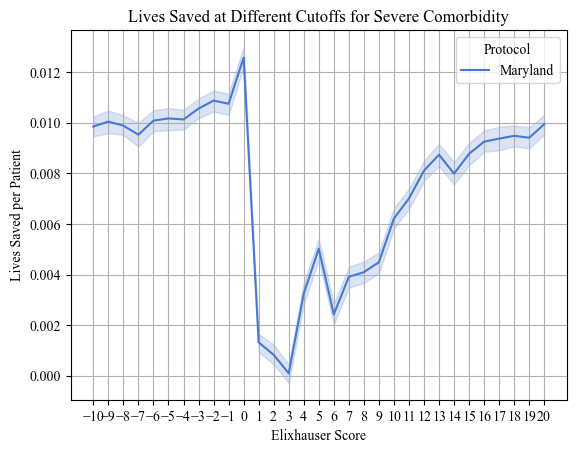

In [8]:
#Lives Saved Rate GRAPHS
plot1a = sns.lineplot(x="ECI_Cutoff", y="LS_rate", 
                    hue="Protocol", 
                    #col='Protocol',
                    #col_order=protocol_order, 
                    #col_wrap=3, 
                    hue_order=protocol_order,
                    data=stats_overall_ECI,
                    #order=2,
                    #x_jitter=0.005,
    #scatter_kws={"s": 1},
    palette='muted' 
)
plot1a.set(title='Lives Saved at Different Cutoffs for Severe Comorbidity', 
           xlabel="Elixhauser Score", 
           ylabel="Lives Saved per Patient",  
           #xlim={1,20}, 
           xticks=(range(-10,21))
           )
plt.savefig("figs/FigS12A.svg", format='svg')
plt.show()

c:\Users\Jon\miniconda3\envs\datasci\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jon\miniconda3\envs\datasci\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


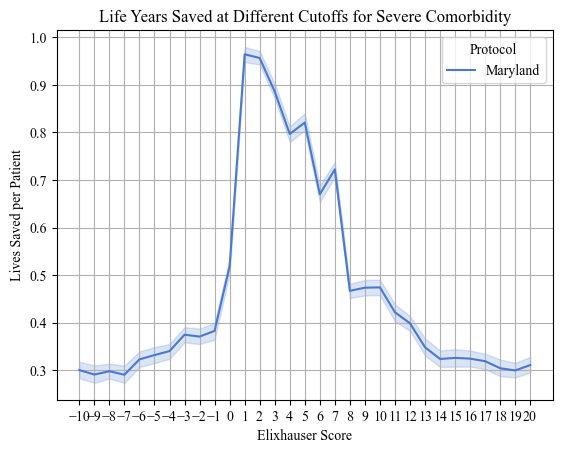

In [9]:
#Life Years Saved Rate GRAPHS
plot1a = sns.lineplot(x="ECI_Cutoff", y="YLS_Cho_rate", 
                    hue="Protocol", 
                    #col='Protocol',
                    #col_order=protocol_order, 
                    #col_wrap=3, 
                    hue_order=protocol_order,
                    data=stats_Cho_overall_ECI,
                    #order=4,
                    #x_jitter=0.005,
    #scatter_kws={"s": 1},
    palette='muted' 
)
plot1a.set(title='Life Years Saved at Different Cutoffs for Severe Comorbidity', 
            xlabel="Elixhauser Score", 
            ylabel="Lives Saved per Patient",
            #xlim={1,20},
            xticks=(range(-10,21))
            )
plt.savefig("figs/FigS12B.svg", format='svg')
plt.show()